<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/09_Regression_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras


In [3]:
filepath = keras.utils.get_file('auto-mpg.data',"http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
filepath

'/root/.keras/datasets/auto-mpg.data'

In [4]:
colnames=['mpg','cylinders','displacement','horsepower','weight','accelrt','modelyear','origin']
data = pd.read_csv(filepath, names=colnames, na_values="?",comment='\t', sep=' ', skipinitialspace=True) # handles both space and tabs
data.head()
# PANDAS TUTORIAL
# https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


,mpg,cylinders,displacement,horsepower,weight,accelrt,modelyear,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
#data.info() # no. of non nulls
data.isna().sum() # no. of nulls


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
accelrt         0
modelyear       0
origin          0
dtype: int64

In [6]:
# EASIEST WAY TO HANDLE NULLS -> DROP THEM!
# 6 null rows/398 total rows = 1.5 % data polluted 
df = data.dropna()
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
accelrt         0
modelyear       0
origin          0
dtype: int64

In [7]:
# LABEL ENCODING, MULTI-HOT ENCODING <- already seen
# but here, ORIGIN is a categorical column
# 1-> USA, 2-> Europe, 3-> Japan 
# CATEGORICAL VALUES SHOULD BE ONE-HOT ENCODING
# 1-hot encoding-> each category becomes it's own column
# Assume ORIGIN 1-> BLR, 2-> NDLS, 3-> BOM
origin = df.pop('origin') # pop function returns and deletes the column from the dataset
df['BLR'] = (origin==1)*1
df['NDLS'] = (origin==2)*1
df['BOM'] = (origin==3)*1




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [8]:
df.tail() # opposite of head-> shows data from bottom

,mpg,cylinders,displacement,horsepower,weight,accelrt,modelyear,BLR,NDLS,BOM
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


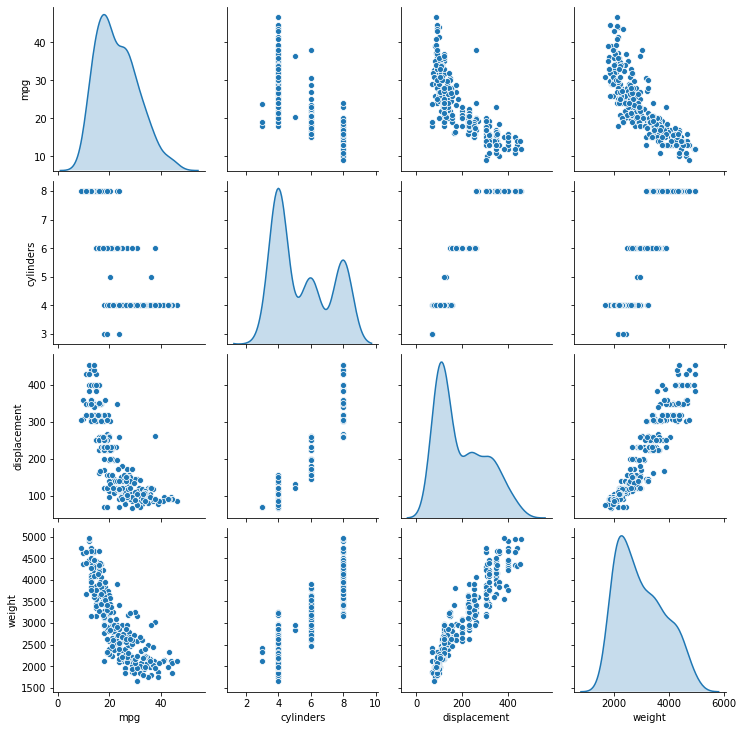

In [9]:
# SAMPLING is another way of creating training/testing/validation data 
traindata = df.sample(frac=0.75, random_state=42)
# for testing-> i cannot do sampling again, else we can end up with repeat rows in train/test
testdata = df.drop(traindata.index)
# DROP train from main data, whatever is left is testing data 
# WE SHUFFLED AND COLLECTED TRAINING DATA
# CORRELATION- HEATMAP, SCATTERPLOT (output distributed), distribution of inputs also 
# did all of this to arrive at most usable variable, discard the unsuitable ones 
sns.pairplot(traindata[['mpg','cylinders','displacement','weight']], diag_kind='kde')
plt.show()
# WHY WERE NOT 1-HOT-CATEGORIES ALSO PLOTTED?
# We have created 1-hot mapping, so that we could distinctly filter out data exclusively related to
# that category 
# these columns should be used ONLY for filtering and NOT for ML or DL 

In [0]:
# 2 discrete values in a category? Label Encoding is good enough-> 1 and 0 will create a gap between data, good enough for
# classification or filtering(regression)
# >2 discrete values in a category? One-Hot Encoding
 # WHATEVER MU and SIGMA, i decide for train, i can also use for test <- another way to fight overfitting 
trainy = traindata.pop('mpg')
testy = testdata.pop('mpg')
# std, mean -> z-score for normalization
# T -> transpose


In [0]:
stats = traindata.describe().T

In [0]:
# to fight overfitting, you can calculate mu and sigma only for training dataset,
# and apply same values to test dataset also 
mu = stats['mean']
sigma = stats['std']
trainx = (traindata - mu)/sigma 
testx = (testdata - mu)/sigma 
# Z-Score Normalization from -inf to +inf

In [13]:
trainx.head()
# Either I can proceed with this data and see how model behaves
# Above works, because the correct category becomes positive, while other categories become negative 
# as a result, the gap between these discrete values will be even more than 0 and 1 gap  
# or normalize only the required columns and create a diff model to see how that behaves 

,cylinders,displacement,horsepower,weight,accelrt,modelyear,BLR,NDLS,BOM
79,-0.876718,-0.947883,-0.924091,-0.939884,0.877874,-1.059696,-1.263456,2.153606,-0.510796
276,-0.876718,-0.710868,0.245640,-0.226985,0.062016,0.562963,-1.263456,2.153606,-0.510796
248,-0.876718,-0.995286,-1.152951,-1.397504,0.310321,0.562963,-1.263456,-0.462758,1.951072
56,-0.876718,-0.995286,-0.898662,-1.215162,1.764677,-1.330139,0.788788,-0.462758,-0.510796
393,-0.876718,-0.530736,-0.491799,-0.232867,0.026544,1.644736,0.788788,-0.462758,-0.510796


In [0]:
# let's build the model
# Python -> Flask, C# -> either WEbAPI/ASP.netCore/Xamarin, Java-> JSP, NodeJS -> server.js 
# Being able to bring my model into use
# Collecting the data: because a common user doesn't know how to write program or clean data!
# they would provide us raw inputs, a ds should be efficient enough to write an API to take such input
# POST API to accept an image an return it's class! <- at least this much should be known
# Deployment: API (on premise), bare-minimum docker and kubernetes to deploy model as a container (on premise or IoT or dev/test)
# or kubernetes (production usage) [ON CLOUD ONLY- you don't need to know this on premise]
# on prem=> API [YOU] or Docker [SysAdmin will configure, you should only know how to deploy to docker]
# on cloud=> API, Docker, Kubernetes -> none of them will require a separate ADMIN! [You]

HP_epochs = 1000
HP_Layer1 = 64
HP_Layer2 = 64
HP_LR = 1e-3 # 10 to the power -3 or 0.001

#Write user-defined optimizer, no Adam optimizer
optimizer = tf.keras.optimizers.RMSprop(HP_LR) # RMSProp is used for Regression-Root Mean Squared Propogation
# Adam Optimizer is RMSProp with additional vector Momentum 

model = keras.Sequential()
model.add(keras.layers.Dense(HP_Layer1, activation=tf.nn.relu, input_shape=[len(trainx.keys())]))
model.add(keras.layers.Dense(HP_Layer2, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])
# CLassification -> ENTROPY
# REGRESSION -> MEAN SQUARED ERROR (Normalized data), MEAN ABSOLUTE ERROR (unnormalized and norm. data)

# MOMENTUM application resulted in change of learning rate
# 2 things could change -> Magnitude or Direction 
# Angular Momentum -> BOTH MAGNITUDE AND DIRECTION to find the cheapest path 
# 




In [0]:
HP_epochs = 1000
HP_Layer1 = 64
HP_Layer2 = 128
HP_Layer3 = 256
HP_LR = 1e-4 # 10 to the power -3 or 0.001

#Write user-defined optimizer, no Adam optimizer
optimizer = tf.keras.optimizers.RMSprop(HP_LR) # RMSProp is used for Regression-Root Mean Squared Propogation
# Adam Optimizer is RMSProp with additional vector Momentum 

model2 = keras.Sequential()
model2.add(keras.layers.Dense(HP_Layer1, activation=tf.nn.relu, input_shape=[len(trainx.keys())]))
model2.add(keras.layers.Dense(HP_Layer2, activation=tf.nn.relu))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(HP_Layer3, activation=tf.nn.relu))
model2.add(keras.layers.Dropout(0.25))
model2.add(keras.layers.Dense(1))

model2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])

In [34]:
model.summary()
# 9 inputs X 64 + 64 = 640
# 64 X 64 + 64 = 4160
# 64 X 1 + 1 = 65
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
______________________________

In [23]:
# instead of heavy printing on screen or a blank waiting time period, let's create a custom print function
class Printer(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
# delay_evaluation, evaluation_interval -> they were controlling when to early stop
# patience=10 -> keep checking for 10 epochs-> if all of them are poorly performing then stop 
# EARLY STOPPING -> STOP IF POOR PERFORMANCE 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# patience -> how long before you take action?

history = model.fit(trainx, trainy, epochs=HP_epochs, validation_split=0.2, verbose=0, callbacks=[early_stop, Printer()])
print(len(history.epoch))


................................................................64


In [51]:
class Printer(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
# delay_evaluation, evaluation_interval -> they were controlling when to early stop
# patience=10 -> keep checking for 10 epochs-> if all of them are poorly performing then stop 
# EARLY STOPPING -> STOP IF POOR PERFORMANCE 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# patience -> how long before you take action?

history = model2.fit(trainx, trainy, epochs=HP_epochs, validation_split=0.2, verbose=0, callbacks=[early_stop, Printer()])
print(len(history.epoch))


....................................................................................................
....................................136


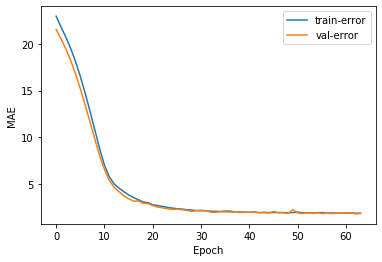

In [26]:
# let's plot!
hist = pd.DataFrame( history.history)
hist['epoch'] = history.epoch
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='train-error')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='val-error')
plt.legend()
plt.show()


#hist.head()
# Mean Squared Error -> minimize the square of the error so that error is automatically reduced

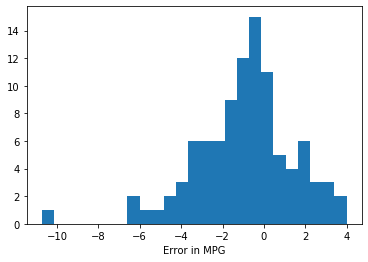

In [31]:
#let's score/test the model 1
predictions = model.predict(testx).flatten() # Flatten converts Tensor into Array

error = predictions - testy
plt.hist(error, bins=25)
plt.xlabel("Error in MPG")
plt.show()

# negative: predicted MPG < actual MPG 
# positive: predicted MPG > actual MPG
# which section is best? 0!!!! Why-> because that's the point where prediction = actual

#plt.scatter(testy, predictions)
#plt.xlabel('Actual')
#plt.ylabel('predicted')
#plt.show()
#predictions
# let's evaluate the model
#loss, mse, mae = model.evaluate(testx, testy)

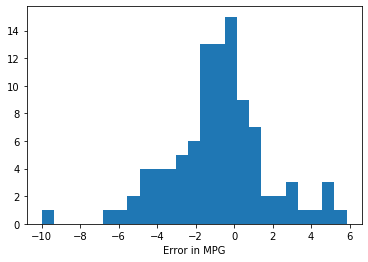

In [36]:
# PLOTTING WITH Custom Adam LR = 1e-4, Dropout=.25
predictions = model2.predict(testx).flatten() # Flatten converts Tensor into Array

error = predictions - testy
plt.hist(error, bins=25)
plt.xlabel("Error in MPG")
plt.show()

# RMS + Direction in which to fix error = Adam
# RMSprop -> find a local minima smaller than current error
# Adam -> Do RMSprop but also in the direction of error  

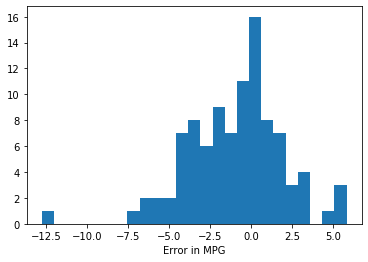

In [42]:
# PLOTTING WITH RMSprop LR = 1e-4
predictions = model2.predict(testx).flatten() # Flatten converts Tensor into Array

error = predictions - testy
plt.hist(error, bins=25)
plt.xlabel("Error in MPG")
plt.show()



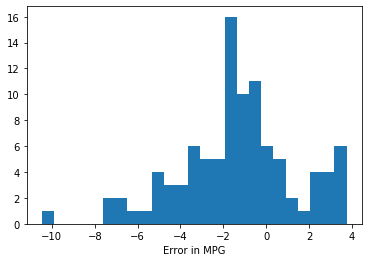

In [52]:
# PLOTTING WITH Adam LR = 1
predictions = model2.predict(testx).flatten() # Flatten converts Tensor into Array

error = predictions - testy
plt.hist(error, bins=25)
plt.xlabel("Error in MPG")
plt.show()